In [1]:
from scipy.signal import convolve2d
from PIL import Image, ImageOps
import numpy as np

In [2]:
kernel = np.asarray([[1,1,1], [0,0,0], [-1,-1,-1]])
kernel2 = np.asarray([[-1,-1,-1], [0,0,0], [1,1,1]])
kernel_size = 3
stride = 1

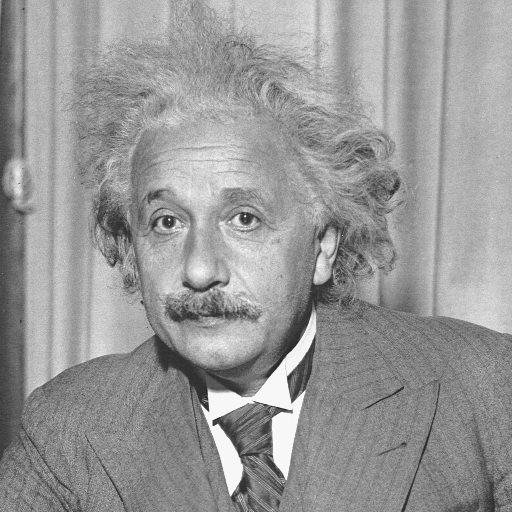

In [3]:
im = Image.open("./einstein.pgm")
im

In [4]:
def myConvolve(array, kernel, stride=1, kernel_size=3):
    final = []
    x = np.array(im, dtype=np.float64)
    for i in range(1, len(x[:, 0])-(kernel_size-1), stride):
        temp = []
        for j in range(1, len(x[0])-(kernel_size-1), stride):
            temp.append(np.multiply(np.asarray([[x[i-1,j-1],x[i-1,j], x[i-1,j+1]], [x[i,j-1],x[i,j], x[i,j+1]], [x[i+1,j+1],x[i+1,j], x[i+1,j+1]]]), kernel).sum())
        final.append(temp)
        temp = []
    final = np.asarray(final)
    return final

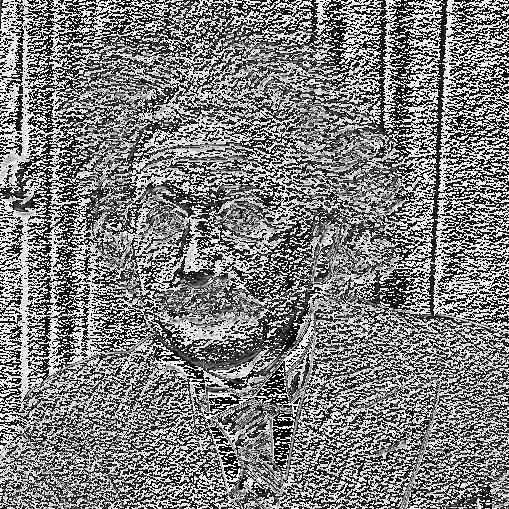

In [5]:
im_conv = Image.fromarray((myConvolve(im, kernel, stride=stride, kernel_size=3).astype('uint8')))
im_conv         

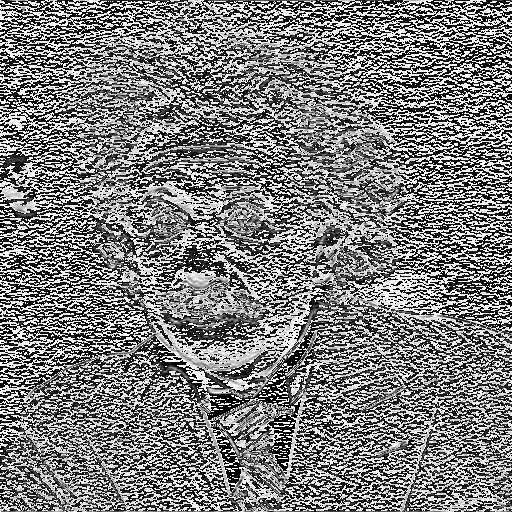

In [6]:
teste = np.asarray(convolve2d(im, kernel, mode="same"))
teste = Image.fromarray(teste.astype('uint8'))
teste

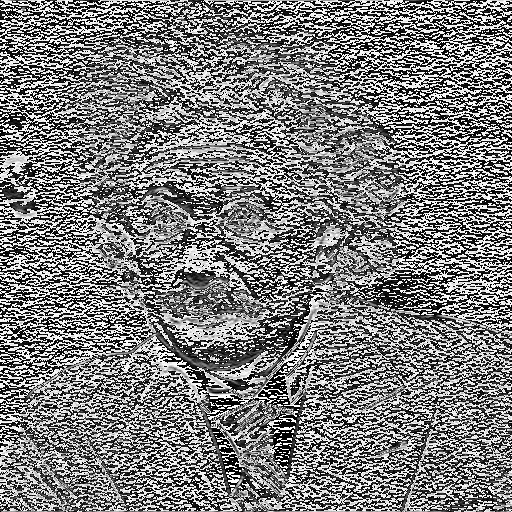

In [7]:
teste = np.asarray(convolve2d(im, kernel2, mode="same"))
teste = Image.fromarray(teste.astype('uint8'))
teste